# Trivial system & Baseline system

Define reference systems and analysis

Report required performance measures

• F1-score 
• Accuracy

## Import necessary library

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings

## Get data from previous cvs file

In [28]:
def getData(fname1, fname2):
    df_train = pd.read_csv(fname1)
    df_test = pd.read_csv(fname2)
    data_train = np.array(df_train)
    data_test = np.array(df_test)
    xdata_train = data_train[:,:len(data_train[0]) - 1]
    ydata_train = data_train[:, -1]
    xdata_test = data_test[:,:len(data_test[0]) - 1]
    ydata_test = data_test[:, -1]
    
    return xdata_train, ydata_train, xdata_test, ydata_test
    
xdata_train_expand, ydata_train_expand, xdata_test_expand, ydata_test_expand = getData("mushroom_train_encode.csv", "mushroom_test_encode.csv")
# print(xdata_train_expand)
print(f"The shape of training xdata shape is", xdata_train_expand.shape)
print(f"The shape of training ydata shape is", ydata_train_expand.shape)
print(f"The shape of testing xdata shape is", xdata_test_expand.shape)
print(f"The shape of testing ydata shape is", ydata_test_expand.shape)

The shape of training xdata shape is (42748, 125)
The shape of training ydata shape is (42748,)
The shape of testing xdata shape is (18321, 125)
The shape of testing ydata shape is (18321,)


## Trivial system
A system that outputs class assignments (S0, S1) at random with probability N0/N and N1/N, respectively; Ni is the number of training data points with class label Si, and N is the total number of training data points.

In [18]:
def trival_sys(xdata_train, ydata_train, xdata_test, ydata_test):
    po = np.sum(ydata_train == 1)    
    ed = np.sum(ydata_train == 0)
    N = len(ydata_train)
    
    ps0 = ed/N
    ps1 = po/N
    
    print(f"P(S0) edible = {ed/N} and P(S1) poisonous = {po/N}")
    
    N_test = len(ydata_test)
    ydata_test_pred = np.random.choice([0,1], size=N_test, p=[ps0, ps1])
    
    
    # Report the F1 score and the accuracy
    score = f1_score(ydata_test_pred, ydata_test)
    print(f"The F1 Score of the trivial system = {score}")
    
    acc = np.sum(ydata_test_pred == ydata_test) / N_test
    print(f"The accuracy of the trivial system = {acc}")
    
    
trival_sys(xdata_train_expand, ydata_train_expand, xdata_test_expand, ydata_test_expand)

P(S0) edible = 0.4480443529521849 and P(S1) poisonous = 0.5519556470478151
The F1 Score of the trivial system = 0.5589720955323427
The accuracy of the trivial system = 0.5091425140549096


## Baseline system

Nearest means classifier

In [50]:
def nearest_mean_classifier_unnormalize(xdata_train, ydata_train):
    
    # Copy the data in case overwrite
    xdata_train = np.copy(xdata_train)
    
    # Split data
    xdata_train, xdata_val, ydata_train, ydata_val = train_test_split(xdata_train, ydata_train, test_size=0.2, random_state=42)
    
    # Calculate mean values for two class using unnormalized value
    mean_ed = np.mean(xdata_train[ydata_train == 0], axis = 0)
    mean_po = np.mean(xdata_train[ydata_train == 1], axis = 0)

    N_train = len(ydata_train)
    N_val = len(ydata_val)
    
    # Train on the training data
    ydata_train_pre = np.zeros(N_train)
    
    for i in range(N_train):
        dist_ed = np.linalg.norm(xdata_train[i] - mean_ed)
        dist_po = np.linalg.norm(xdata_train[i] - mean_po)
        
        # Classify the data to the nearest mean point's class
        if(dist_ed < dist_po):
            ydata_train_pre[i] = 0
        else:
            ydata_train_pre[i] = 1
    
    # Report the F1 score and the accuracy for the training data
    score_train = f1_score(ydata_train_pre, ydata_train)
    print(f"The training F1 Score of nearest mean system on unnormalized data = {score_train}")
    
    acc_train = np.sum(ydata_train_pre == ydata_train) / N_train
    print(f"The training accuracy of nearest mean system on unnormalized data = {acc_train}")
    
    # Test on the validation data
    ydata_val_pre = np.zeros(N_val)
    for i in range(N_val):
        dist_ed = np.linalg.norm(xdata_val[i] - mean_ed)
        dist_po = np.linalg.norm(xdata_val[i] - mean_po)

        # Classify the data to the nearest mean point's class
        if(dist_ed < dist_po):
            ydata_val_pre[i] = 0
        else:
            ydata_val_pre[i] = 1
    
    # Report the F1 score and the accuracy for the training data
    score_val = f1_score(ydata_val_pre, ydata_val)
    print(f"The validation F1 Score of nearest mean system on unnormalized data = {score_val}")
    
    acc_val = np.sum(ydata_val_pre == ydata_val) / N_val
    print(f"The validation accuracy of nearest mean system on unnormalized data = {acc_val}")
    
nearest_mean_classifier_unnormalize(xdata_train_expand, ydata_train_expand)

The training F1 Score of nearest mean system on unnormalized data = 0.6160428397924257
The training accuracy of nearest mean system on unnormalized data = 0.593251067313878
The validation F1 Score of nearest mean system on unnormalized data = 0.6072910824453168
The validation accuracy of nearest mean system on unnormalized data = 0.5905263157894737


As we can see, the accuracy indicates that the nearest mean system on unnormalized dataset doesn't perform well. To compare with the baseline system, we experiment the nearest mean on normalized data.

In [51]:
def nearest_mean_classifier_normalize(xdata_train, ydata_train, printOrNot = True):
#     print(xdata_train)
#     print(xdata_train.shape)

    # Copy the data in case overwrite
    xdata_train = np.copy(xdata_train)
    
    # Shuffle data
    p = np.random.permutation(xdata_train.shape[0])
    xdata_train = xdata_train[p]
    ydata_train = ydata_train[p]
    
    # Split data
    xdata_train, xdata_val, ydata_train, ydata_val = train_test_split(xdata_train, ydata_train, test_size=0.2, random_state=42)
    
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train_scaled = scaler.transform(xdata_train)
    xdata_val_scaled = scaler.transform(xdata_val)
    
    # Calculate mean values for two class using unnormalized value
    mean_ed = np.mean(xdata_train_scaled[ydata_train == 0], axis = 0)
    mean_po = np.mean(xdata_train_scaled[ydata_train == 0], axis = 0)
#     print(mean_ed.shape)
#     print(mean_ed)

    N_train = len(ydata_train)
    N_val = len(ydata_val)
    
    # Train on the training data
    ydata_train_pre = np.zeros(N_train)
    for i in range(N_train):
        dist_ed = np.linalg.norm(xdata_train_scaled[i] - mean_ed)
        dist_po = np.linalg.norm(xdata_train_scaled[i] - mean_po)
        
        # Classify the data to the nearest mean point's class
        if(dist_ed < dist_po):
            ydata_train_pre[i] = 0
        else:
            ydata_train_pre[i] = 1
    
    score_train = f1_score(ydata_train_pre, ydata_train)
    acc_train = np.sum(ydata_train_pre == ydata_train) / N_train
    
    if(printOrNot):
        # Report the F1 score and the accuracy for the training data
        print(f"The training F1 Score of nearest mean system on normalized data = {score_train}")
        print(f"The training accuracy of nearest mean system on normalized data = {acc_train}")

    # Test on the validation data
    ydata_val_pre = np.zeros(N_val)
    for i in range(N_val):
        dist_ed = np.linalg.norm(xdata_val_scaled[i] - mean_ed)
        dist_po = np.linalg.norm(xdata_val_scaled[i] - mean_po)

        # Classify the data to the nearest mean point's class
        if(dist_ed < dist_po):
            ydata_val_pre[i] = 0
        else:
            ydata_val_pre[i] = 1
    
    score_val = f1_score(ydata_val_pre, ydata_val)
    acc_val = np.sum(ydata_val_pre == ydata_val) / N_val
    if(printOrNot):
        # Report the F1 score and the accuracy for the training data
        print(f"The validation F1 Score of nearest mean system on normalized data = {score_val}")
        print(f"The validation accuracy of nearest mean system on normalized data = {acc_val}")

    return score_val, acc_val
    
    
nearest_mean_classifier_normalize(xdata_train_expand, ydata_train_expand)

The training F1 Score of nearest mean system on normalized data = 0.711333019312294
The training accuracy of nearest mean system on normalized data = 0.5519913445230715
The validation F1 Score of nearest mean system on normalized data = 0.7111848055471811
The validation accuracy of nearest mean system on normalized data = 0.551812865497076


(0.7111848055471811, 0.551812865497076)

## Test

In [46]:
def test_nearest_mean_classifier_normalize(xdata_train, ydata_train, xdata_test, ydata_test):
#     print(xdata_train)
#     print(xdata_train.shape)

    # Copy the data in case overwrite
    xdata_train = np.copy(xdata_train)
    xdata_test = np.copy(xdata_test)
    
    # Shuffle data
    p = np.random.permutation(xdata_train.shape[0])
    xdata_train = xdata_train[p]
    ydata_train = ydata_train[p]
    
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train_scaled = scaler.transform(xdata_train)
    xdata_test_scaled = scaler.transform(xdata_test)
    
    # Calculate mean values for two class using unnormalized value
    mean_ed = np.mean(xdata_train_scaled[ydata_train == 0], axis = 0)
    mean_po = np.mean(xdata_train_scaled[ydata_train == 1], axis = 0)
#     print(mean_ed.shape)
#     print(mean_ed)

    N_train = len(ydata_train)
    N_test = len(ydata_test)
    
    # Test on the testing data
    ydata_test_pre = np.zeros(N_test)
    for i in range(N_test):
        dist_ed = np.linalg.norm(xdata_test_scaled[i] - mean_ed)
        dist_po = np.linalg.norm(xdata_test_scaled[i] - mean_po)

        # Classify the data to the nearest mean point's class
        if(dist_ed < dist_po):
            ydata_test_pre[i] = 0
        else:
            ydata_test_pre[i] = 1
    
    score_test = f1_score(ydata_test_pre, ydata_test)
    acc_test = np.sum(ydata_test_pre == ydata_test) / N_test
    
    # Report the F1 score and the accuracy for the training data
    print(f"The testing F1 Score of nearest mean system on normalized data = {score_test}")
    print(f"The testing accuracy of nearest mean system on normalized data = {acc_test}")

    
test_nearest_mean_classifier_normalize(xdata_train_expand, ydata_train_expand,xdata_test_expand, ydata_test_expand)

The testing F1 Score of nearest mean system on normalized data = 0.6989473684210525
The testing accuracy of nearest mean system on normalized data = 0.6643742153812565


Obviously, the F1 score of model on normalized data is much better than the previous one. But there are still too many features that possibly worsen model performance. Therefore I decide to select k features in previous numerical data on the normalized data and take the best k value.

## Feature Selection or Reduction
After the feature engineering step, the dataset will have a large number of features, which can slow down model runtime or possibly worsen model performance. It is important to remove some features (or reduce dimensionality of feature space some other way) and keep 𝑫′ < 𝑫 number of features that are more useful for the prediction task.
Here we use univariate feature selection to reduce the dimension.

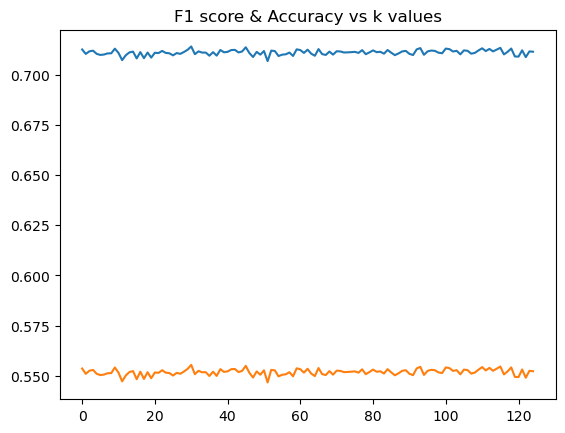

The best performance k is 31


In [52]:
def feature_selection(xdata_train, ydata_train):
    D = xdata_train.shape[1]
    F1_total = np.zeros(D)
    acc_total = np.zeros(D)

    # ignore all UserWarning messages
    warnings.filterwarnings('ignore', category=UserWarning)
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    
    epochs_num = 10

    for epoch in range(epochs_num):
        for k in range(D):
            # f_classif: Compute the ANOVA F-value for the provided sample.
            # Define feature selection
            fs = SelectKBest(score_func=f_classif, k=k+1)

            # Apply feature selection
            xdata_train_selected = fs.fit_transform(xdata_train, ydata_train)

            # Get each k value's f1 score and accuracy
            f1_score, acc = nearest_mean_classifier_normalize(xdata_train_selected, ydata_train, False)

            F1_total[k] += f1_score
            acc_total[k] += acc
        
    for k in range(D):
        F1_total[k] =  F1_total[k] / epochs_num
        acc_total[k] = acc_total[k] / epochs_num

    plt.title("F1 score & Accuracy vs k values")
    plt.plot(np.arange(D), F1_total, label = "F1 score")
    plt.plot(np.arange(D), acc_total, label = "Accuracy")
    plt.show()
    print(f"The best performance k is {np.argmax(F1_total) + 1}")
    
feature_selection(xdata_train_expand, ydata_train_expand)

## Save the selected features as a new csv file

In [24]:
def save_selected_data(xdata_train, ydata_train, xdata_test, ydata_test):
    
    fs = SelectKBest(score_func=f_classif, k=32)
    
    # Apply feature selection
    xdata_train_selected = fs.fit_transform(xdata_train, ydata_train)
    xdata_test_selected = fs.transform(xdata_test)

    # Concatenate the training xdata and training ydata
    data_train_selected = np.zeros((xdata_train_selected.shape[0],xdata_train_selected.shape[1]+1))
    data_train_selected[:, :xdata_train_selected.shape[1]] = np.copy(xdata_train_selected)
    data_train_selected[:,-1] = np.copy(ydata_train)

    # Concatenate the training xdata and training ydata
    data_test_selected = np.zeros((xdata_test_selected.shape[0],xdata_test_selected.shape[1]+1))
    data_test_selected[:, :xdata_test_selected.shape[1]] = np.copy(xdata_test_selected)
    data_test_selected[:,-1] = np.copy(ydata_test)

    # Save the data to csv file
    df_train = pd.DataFrame(data_train_selected)
    df_train.to_csv('mushroom_train_select.csv', index=False)
    df_test = pd.DataFrame(data_test_selected)
    df_test.to_csv('mushroom_test_select.csv', index=False)

In [25]:
save_selected_data(xdata_train_expand, ydata_train_expand, xdata_test_expand, ydata_test_expand)